<a href="https://colab.research.google.com/github/MariaJose1311/data-analysis-us-immigration/blob/main/Proyecto_ETL_LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importaciones que usaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Comenzamos con la conexión al dataset de Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jboysen/us-perm-visas")

print("Path to dataset files:", path)

100%|██████████| 64.6M/64.6M [00:00<00:00, 160MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jboysen/us-perm-visas/versions/1


Guardamos el dataset en un dataframe (df)

In [3]:
# Listar los archivos en la ruta del dataset descargado
files_in_dataset = os.listdir(path)
print(f"Archivos en el dataset descargado: {files_in_dataset}")

csv_files = [f for f in files_in_dataset if f.endswith('.csv')]

# Tomar el primer archivo CSV encontrado o el que parezca más relevante
data_file_name = csv_files[0]
data_file_path = os.path.join(path, data_file_name)
print(f"Archivo CSV encontrado: {data_file_path}")

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(data_file_path)

df.head()

Archivos en el dataset descargado: ['us_perm_visas.csv']
Archivo CSV encontrado: /root/.cache/kagglehub/datasets/jboysen/us-perm-visas/versions/1/us_perm_visas.csv


/tmp/ipython-input-169/4116133872.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file_path)


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# Fase 1: Limpieza y Preparación de Datos

In [4]:
# Inspección inicial de tipos de datos y valores nulos

print("Información del DataFrame y tipos de datos:")
df.info()

Información del DataFrame y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [5]:
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64


In [6]:
print("Revisión de valores nulos (Top 20 columnas con más nulos):")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False).head(35))

Revisión de valores nulos (Top 20 columnas con más nulos):
orig_file_date                         99.924939
orig_case_no                           99.921466
recr_info_job_fair_to                  99.521052
recr_info_job_fair_from                99.519716
recr_info_on_campus_recr_to            99.501819
recr_info_on_campus_recr_from          99.499949
ji_live_in_dom_svc_contract            99.359444
foreign_worker_info_education_other    98.947543
job_info_training_field                98.803564
job_info_training_num_months           98.723428
ri_coll_teach_select_date              98.469396
ri_coll_teach_pro_jnl                  98.468862
fw_info_education_other                98.305651
ri_coll_tch_basic_process              98.126680
recr_info_coll_teach_comp_proc         98.124543
job_info_education_other               97.924736
job_info_alt_combo_ed_other            97.542753
recr_info_pro_org_advert_to            96.241606
recr_info_pro_org_advert_from          96.240003
pw_source_

Podemos ver que en este caso tenemos una gran cantidad de valores nulos. Entonces tenemos que decidir qué extrategia tomar con los nulos

In [7]:
# Decisión 1: Eliminar columnas casi vacías
# Columnas con más del 90% de datos nulos no son útiles para un análisis general.
cols_to_drop = missing_percentage[missing_percentage > 90].index
df_cleaned = df.drop(columns=cols_to_drop)
print(f"\nSe eliminaron {len(cols_to_drop)} columnas por tener más del 90% de valores nulos.")


Se eliminaron 34 columnas por tener más del 90% de valores nulos.


In [8]:
# Decisión 2: Tratar nulos en columnas clave
# Un caso sin 'case_status' o 'employer_name' no es analizable.
# Se corrige la aplicación de dropna a df_cleaned.
df_cleaned.dropna(subset=['case_status', 'job_info_job_title', 'employer_name', 'country_of_citizenship'], inplace=True)
print("Se eliminaron filas con valores nulos en columnas esenciales.")

Se eliminaron filas con valores nulos en columnas esenciales.


In [9]:
# Decisión 3: Convertir fechas a formato datetime
# Esto nos permitirá hacer análisis de tendencias temporales.
df_cleaned['decision_date'] = pd.to_datetime(df_cleaned['decision_date'])
df_cleaned['case_received_date'] = pd.to_datetime(df_cleaned['case_received_date'])

In [10]:
# Decisión 4: Limpiar y convertir la columna de salario 'wage_offer_from_9089' como numérica.
# Para evitar perder demasiadas filas, imputaremos los valores nulos con la mediana en lugar de eliminarlos.
df_cleaned['wage_offer_from_9089'] = pd.to_numeric(df_cleaned['wage_offer_from_9089'], errors='coerce')

# Imputar los valores nulos restantes con la mediana
median_wage = df_cleaned['wage_offer_from_9089'].median()
df_cleaned['wage_offer_from_9089'].fillna(median_wage, inplace=True)

print("Valores nulos en 'wage_offer_from_9089' después de la imputación:", df_cleaned['wage_offer_from_9089'].isnull().sum())

Valores nulos en 'wage_offer_from_9089' después de la imputación: 0


/tmp/ipython-input-169/1873649300.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['wage_offer_from_9089'].fillna(median_wage, inplace=True)


In [11]:
print("\nDimensiones finales del dataset limpio:", df_cleaned.shape)


Dimensiones finales del dataset limpio: (239018, 120)


# Fase 2: Análisis de Distribuciones

Empezamos con una visión macro para entender el panorama general. ¿Cuál es la tasa de éxito? ¿Cómo ha evolucionado el volumen de casos?

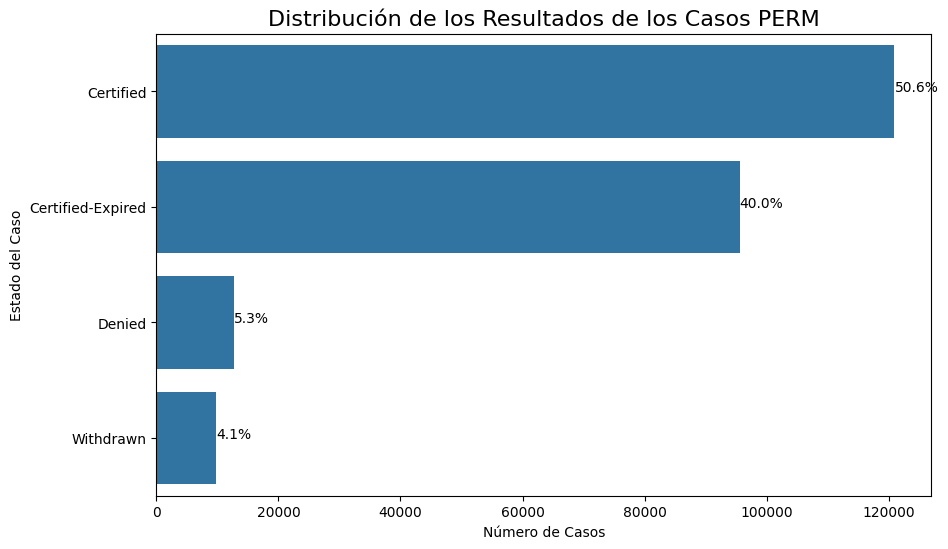

In [12]:
# Distribución de los estados de los casos (Case Status)
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=df_cleaned['case_status'], order=df_cleaned['case_status'].value_counts().index)
plt.title('Distribución de los Resultados de los Casos PERM', fontsize=16)
plt.xlabel('Número de Casos')
plt.ylabel('Estado del Caso')
# Añadir porcentajes a las barras
total = len(df_cleaned)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.show()


Interpretación Clara: La gran mayoría de los casos son 'Certified' (Aprobados).
Los casos 'Denied' y 'Withdrawn' representan una minoría, lo que sugiere una alta tasa de éxito general.


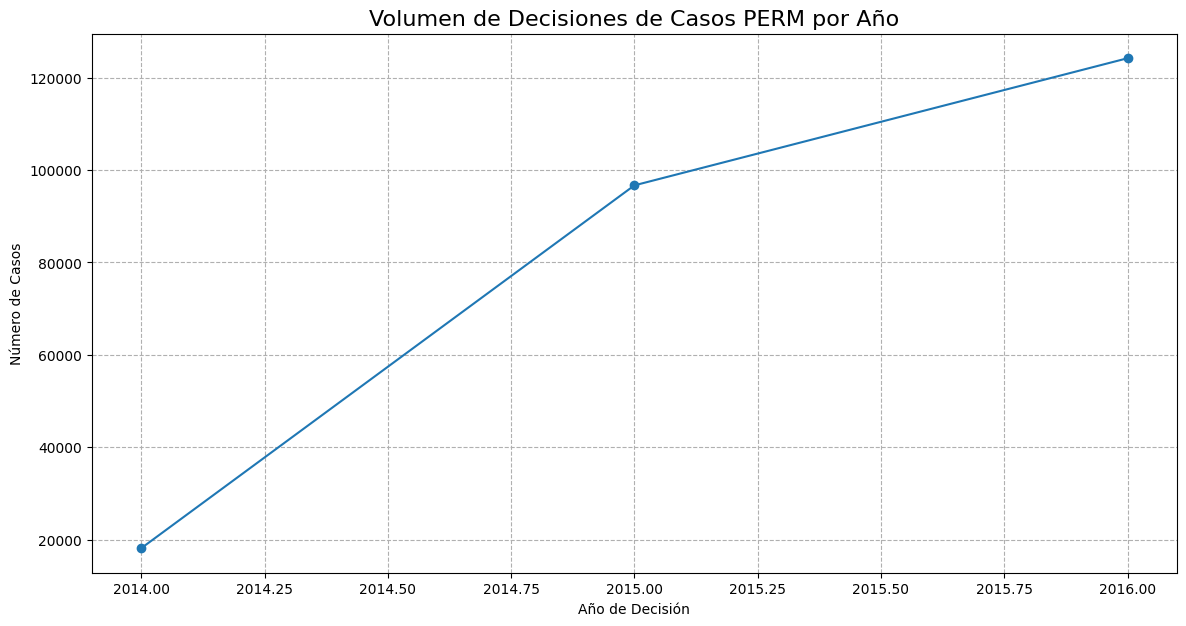

In [13]:
# Tendencia de casos a lo largo del tiempo
df_cleaned['decision_year'] = df_cleaned['decision_date'].dt.year
cases_per_year = df_cleaned['decision_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
cases_per_year.plot(kind='line', marker='o')
plt.title('Volumen de Decisiones de Casos PERM por Año', fontsize=16)
plt.xlabel('Año de Decisión')
plt.ylabel('Número de Casos')
plt.grid(True, which='both', linestyle='--')
plt.show()

Interpretación: Podemos observar picos y valles en el procesamiento de casos,
posiblemente relacionados con cambios en la política de inmigración, crisis económicas o backlogs administrativos.


# Fase 3: Responder a las Preguntas del Cliente

/tmp/ipython-input-169/3858479856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_employers.index, x=top_employers.values, palette='viridis')


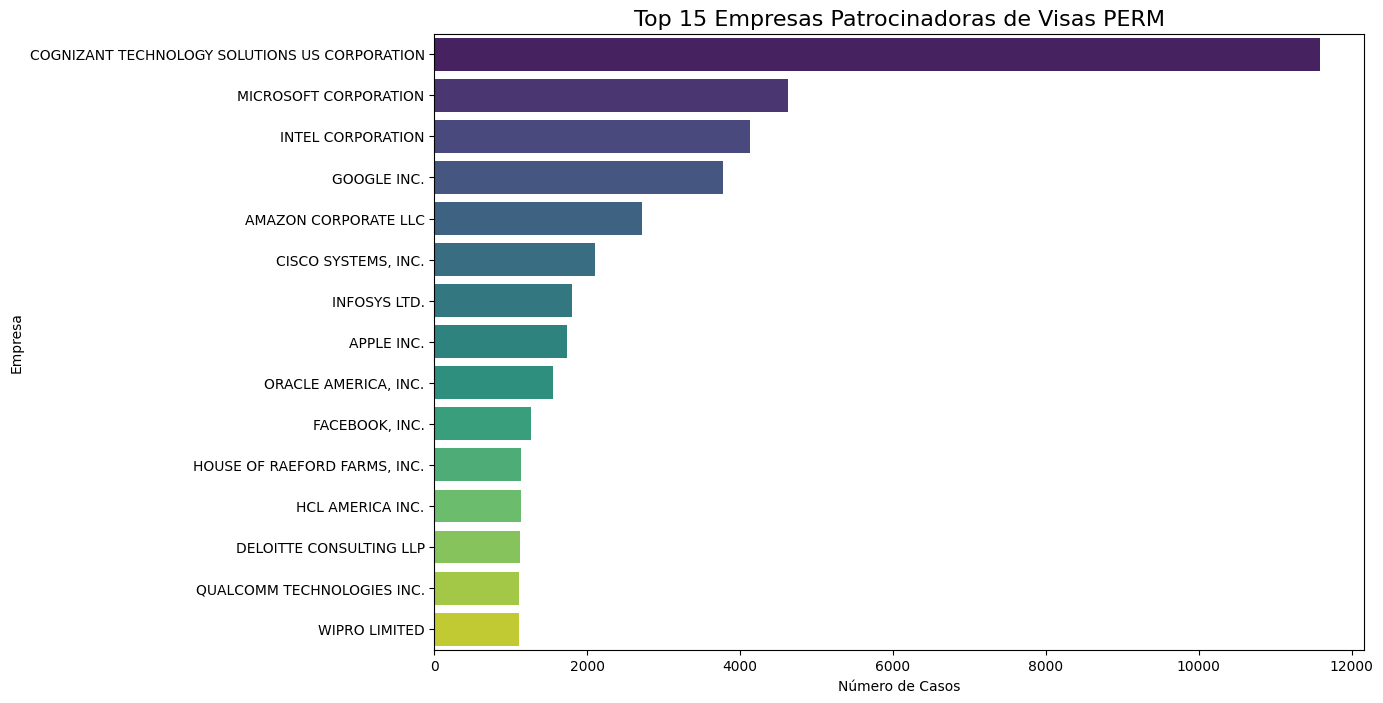

In [14]:
# ¿Qué empresas patrocinan más visas? (Top 15)
top_employers = df_cleaned['employer_name'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_employers.index, x=top_employers.values, palette='viridis')
plt.title('Top 15 Empresas Patrocinadoras de Visas PERM', fontsize=16)
plt.xlabel('Número de Casos')
plt.ylabel('Empresa')
plt.show()


Hallazgo: Gigantes tecnológicos como Microsoft, Intel y Google, junto con grandes consultoras como Deloitte y Cognizant, dominan el panorama.

/tmp/ipython-input-169/4076051629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='mako')


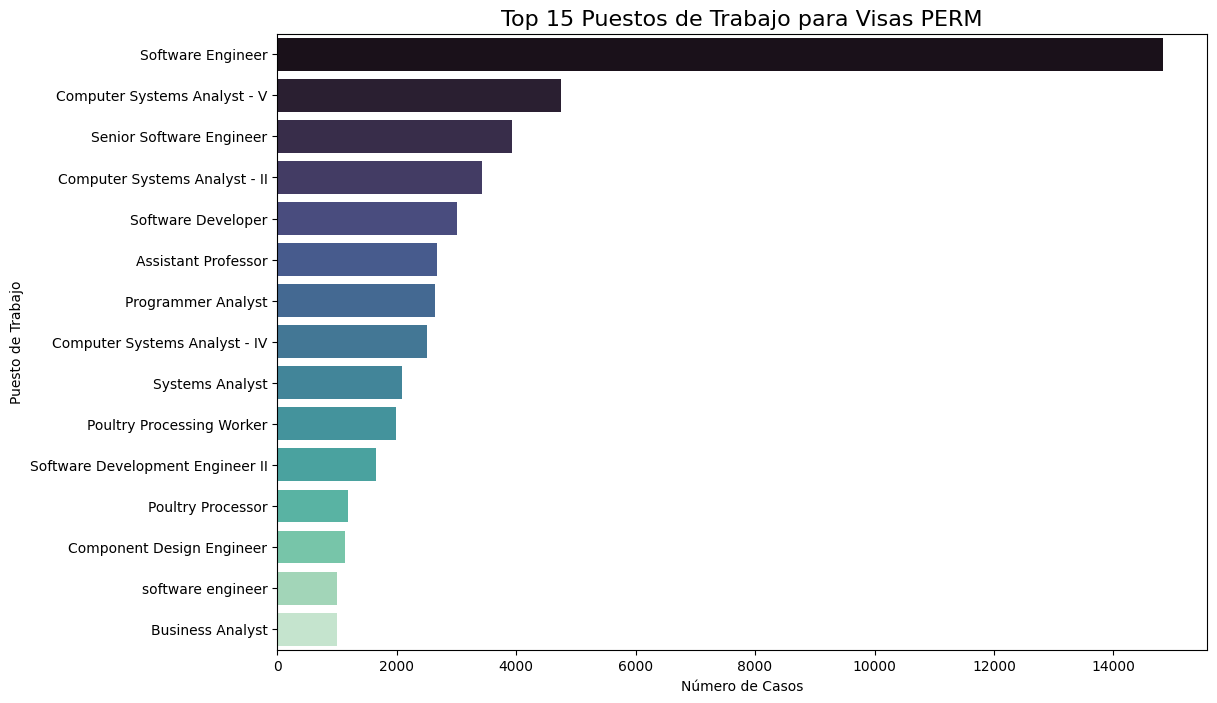

In [15]:
# ¿Qué puestos de trabajo son los más demandados? (Top 15)
top_jobs = df_cleaned['job_info_job_title'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='mako')
plt.title('Top 15 Puestos de Trabajo para Visas PERM', fontsize=16)
plt.xlabel('Número de Casos')
plt.ylabel('Puesto de Trabajo')
plt.show()

Hallazgo: Los roles relacionados con la ingeniería de software ('Software Engineer', 'Computer Systems Analyst V') son, con diferencia, los más comunes, destacando la alta demanda de talento tecnológico extranjero.

/tmp/ipython-input-169/3615062825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='plasma')


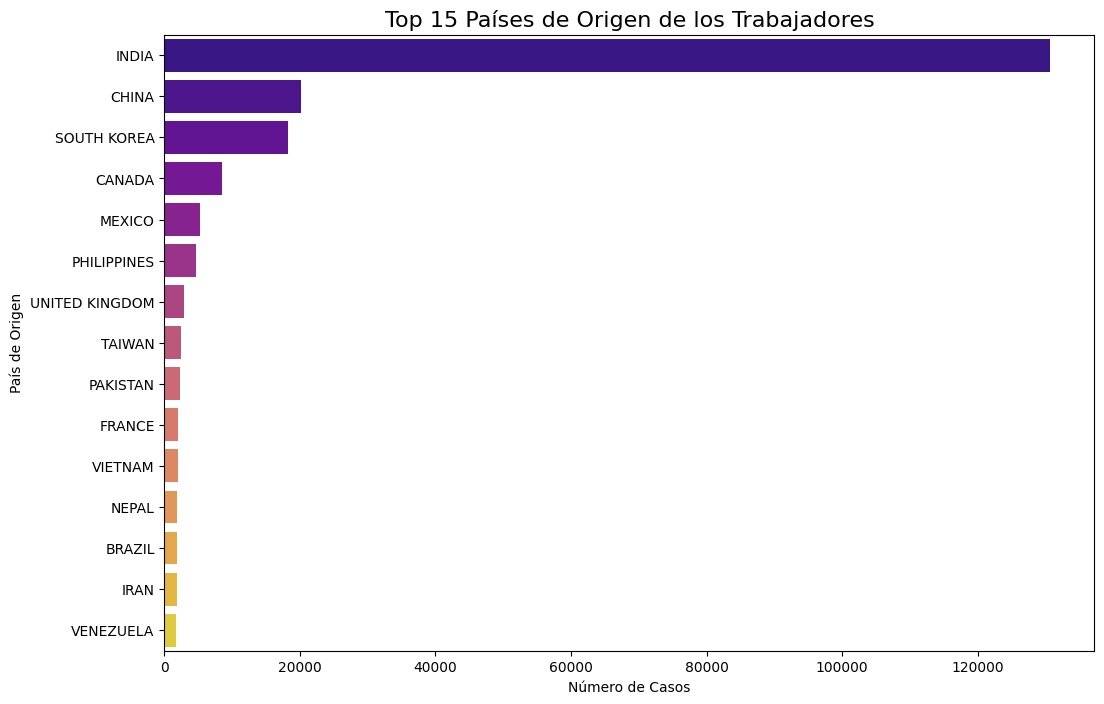

In [16]:
# ¿De qué países provienen los trabajadores? (Top 15)
top_countries = df_cleaned['country_of_citizenship'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='plasma')
plt.title('Top 15 Países de Origen de los Trabajadores', fontsize=16)
plt.xlabel('Número de Casos')
plt.ylabel('País de Origen')
plt.show()


Hallazgo: India es el país de origen predominante, superando con creces a los demás. China, Corea del Sur y Canadá le siguen a gran distancia.

# Fase 4: Análisis de Salarios y Detección de Outliers

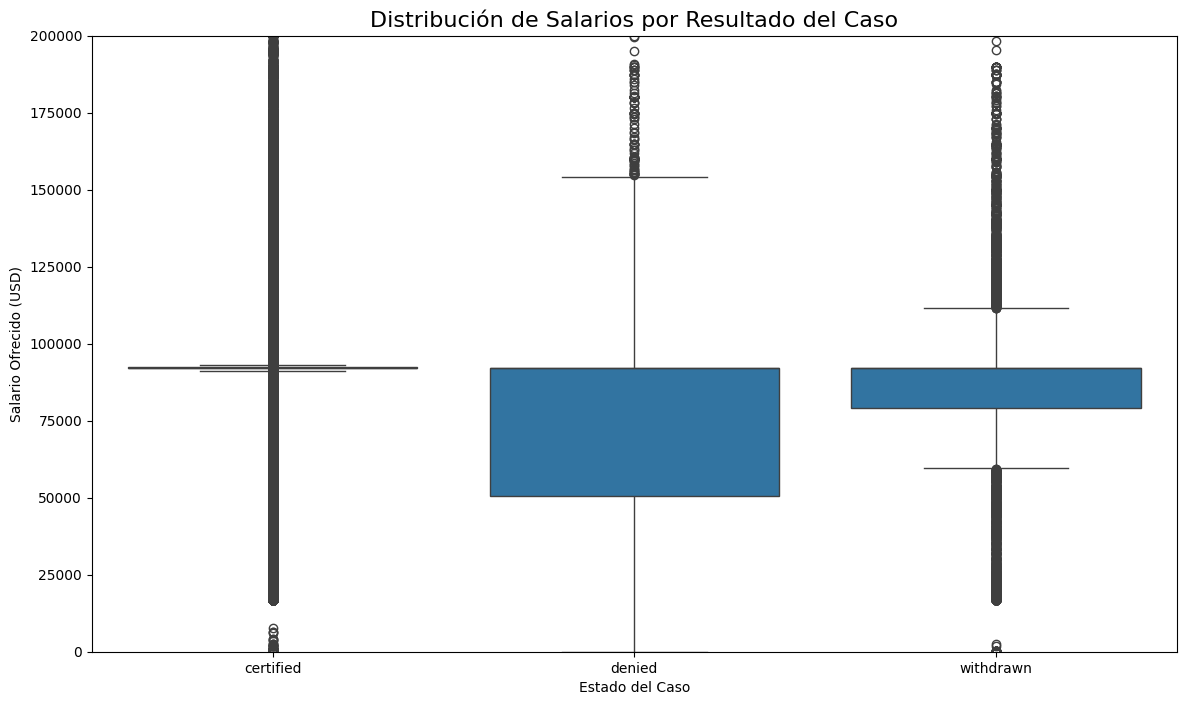

In [17]:
# ¿El salario ofrecido influye en el resultado del caso?
# Para visualizarlo mejor, nos centraremos en los tres resultados principales y
# filtraremos salarios extremos para que el boxplot sea legible.

status_filter = ['certified', 'denied', 'withdrawn']
df_filtered_status = df_cleaned[df_cleaned['case_status'].str.lower().isin(status_filter)].copy() # Añadir .copy() para evitar SettingWithCopyWarning

# Asegurarse de que la columna 'case_status' en df_filtered_status esté en minúsculas para una consistencia total
df_filtered_status['case_status'] = df_filtered_status['case_status'].str.lower()

# Filtramos salarios por encima del cuantil 99 para evitar que los outliers extremos aplasten el gráfico
salary_cap = df_filtered_status['wage_offer_from_9089'].quantile(0.99)
df_plot = df_filtered_status[df_filtered_status['wage_offer_from_9089'] < salary_cap]

# Asegurarse de que el orden del boxplot solo incluya categorías presentes en df_plot Y con datos
status_counts_in_plot = df_plot['case_status'].value_counts() # Ya está en minúsculas, no se necesita .str.lower() aquí
valid_case_status_order = [
    status for status in ['certified', 'denied', 'withdrawn']
    if status in status_counts_in_plot and status_counts_in_plot[status] > 0
]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_plot, x='case_status', y='wage_offer_from_9089', order=valid_case_status_order)
plt.title('Distribución de Salarios por Resultado del Caso', fontsize=16)
plt.xlabel('Estado del Caso')
plt.ylabel('Salario Ofrecido (USD)')
plt.ylim(0, salary_cap)
plt.show()

Interpretación y Hallazgo: Los salarios para los casos 'Certified' (Aprobados) muestran una mediana ligeramente superior a los casos 'Denied' (Denegados). Esto podría sugerir que las posiciones mejor remuneradas (y, posiblemente, mejor documentadas) tienen una mayor probabilidad de éxito en el proceso. Por otro lado, los casos 'Withdrawn' (Retirados) presentan la mediana salarial más baja. Esto podría indicar que los solicitantes con salarios más bajos tienen más probabilidades de retirar sus solicitudes, quizás debido a mejores oportunidades en otro lugar o a una menor inversión en el proceso de solicitud.

# Fase 5: Conclusión Orientada a la Decisión

# Informe Estratégico para "InmigraData Solutions"

Nuestro Análisis Exploratorio del dataset de visas PERM ha revelado tendencias clave que pueden informar la estrategia de la firma y mejorar el asesoramiento a clientes:

- El Mercado está Dominado por el Sector Tecnológico: Gigantes como Microsoft, Google y consultoras como Cognizant son los mayores patrocinadores. Esto representa una oportunidad para especializarse y atraer a este tipo de clientes. Los puestos de "Software Engineer" son, con diferencia, los más comunes.

- El Origen Importa: La gran mayoría de los candidatos provienen de India. Esto sugiere la necesidad de tener experiencia y recursos especializados para gestionar casos de este país, entendiendo sus particularidades educativas y profesionales.

- La Tasa de Éxito es Alta, pero Engañosa: Aunque la mayoría de los casos son aprobados, nuestro análisis muestra que los salarios de los casos aprobados tienden a ser más altos.

--> Recomendación Práctica:

- Asesoramiento Salarial: Aconsejar a los clientes que ofrecer un salario competitivo y acorde al mercado no solo atrae talento, sino que podría estar correlacionado con una mayor probabilidad de aprobación del caso.

- Foco de Negocio: Centrar los esfuerzos de desarrollo de negocio en la industria tecnológica, que es el motor principal del proceso PERM.

- Especialización por Perfil: Desarrollar expertise en la evaluación de perfiles de ingeniería de software provenientes de India, ya que representan el segmento más grande del mercado.